<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULO 1 - SEMANA 4**

**Ejercicio 1. Sistema RLC**

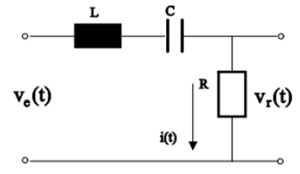

Fig. 1-1. Esquemático del circuito RLC.

Sea el sistema eléctrico de la Fig. 1-1, se requiere obtener la evolución temporal de la corriente para diferentes tensiones de entrada.
Para el caso de asignarle valores unitarios a Ve, R, L y C, con entra entrada Heaviside unitaria se obtuvo la solución analítica como

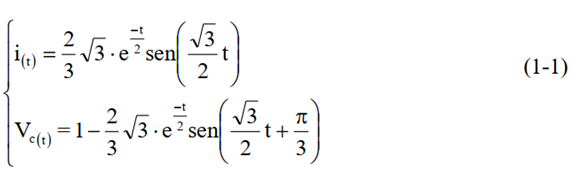


Expresión matricial

Para determinar la evolución de la corriente del circuito se pueden plantear las ecuaciones diferenciales del mismo como,

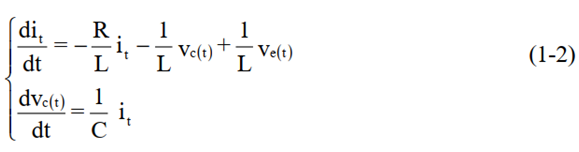

Las Ec. (1-2) se pueden expresar en una ecuación matricial-vectorial con las representaciones en variables de estado definiendo a i, vc como variables de estado y a x como vector de estado, es decir x=[ i vc]T se convierte en

  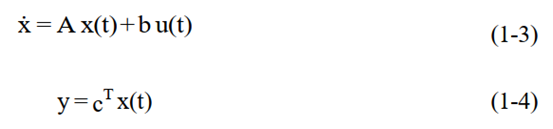

donde las matrices contienen a los coeficientes del circuito,

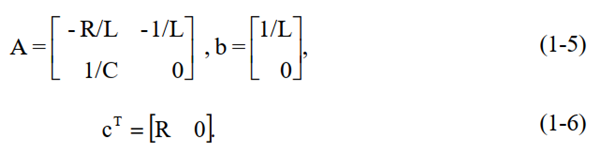

Nótese que las ecuaciones (1-1) son la solución al sistema para coeficientes específicos, en este caso, de valor unitario.



Actividades

1- Asignar valores a R=1 Ohm, L=1Hy, y C=1F.

a.	Empleando la solución analítica, simular 3 segundos con una entrada de tensión escalón de 12V.





b.	Empleando el cálculo mediante Euler, verificar que coincida con el ítem anterior.

Asignando los valores para R, L, C unitarios y Ve=12 V, aplicando el método de Euler al sistema en estudio y comparando con la solucion analitica resulta:

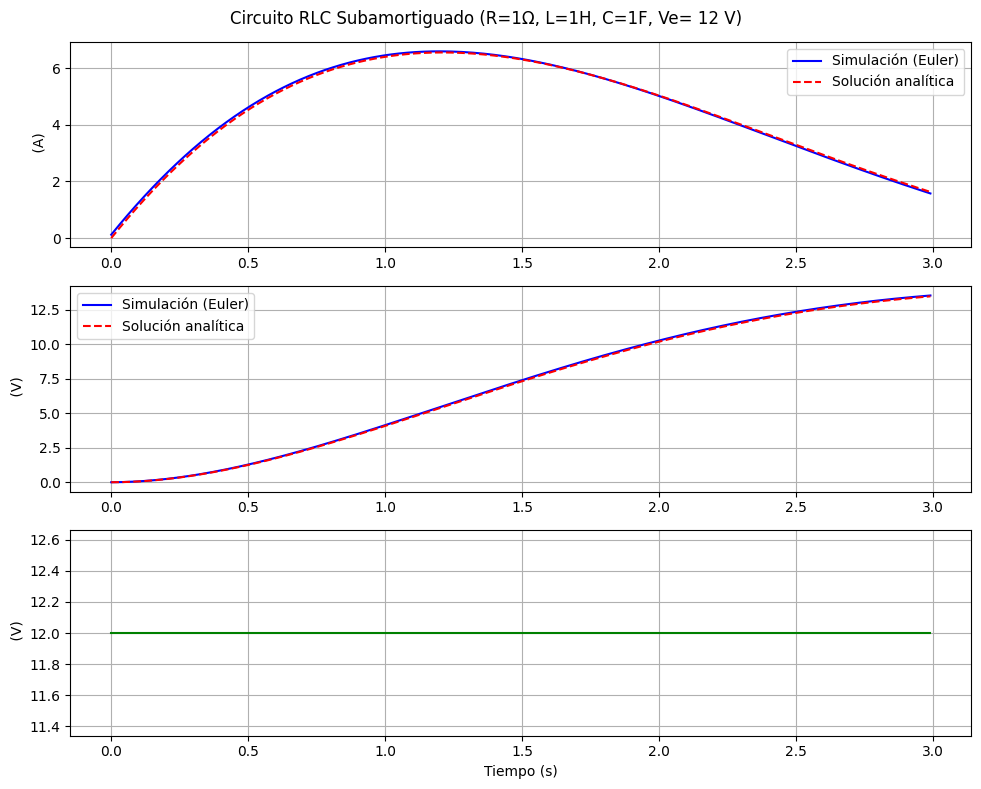

In [32]:
# @title
import numpy as np
from matplotlib import pyplot as plt

# Parámetros del circuito
R = 1      # Ohm
L = 1      # H
C = 1      # F
h = 1e-2   # Paso de tiempo
t_simul = 3  # Tiempo de simulación (3 segundos)

# Matrices del sistema
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicialización
t = np.arange(0, t_simul, h)
x1 = np.zeros_like(t)  # Corriente i_L(t)
x2 = np.zeros_like(t)  # Voltaje V_C(t)
u = np.zeros_like(t)   # Entrada Va(t)

# Condiciones iniciales
x = np.array([[0], [0]])  # [i_L(0); V_C(0)]
Va = 12  # Escalón de 12V

# Simulación con Euler
for ii in range(len(t)):
    xp = np.matmul(A, x) + B * Va  # dx/dt = A*x + B*u
    x = x + xp * h  # Método de Euler
    x1[ii] = x[0]   # Almacena corriente
    x2[ii] = x[1]   # Almacena voltaje en C
    u[ii] = Va      # Almacena entrada

# Solución analítica (subamortiguada)
omega_0 = 1 / np.sqrt(L * C)       # Frecuencia natural (1 rad/s)
zeta = R / (2 * np.sqrt(L / C))    # Factor de amortiguamiento (0.5)
omega_d = omega_0 * np.sqrt(1 - zeta**2)  # Frecuencia amortiguada (√3/2 rad/s)

# Corriente i(t)
i_analitico = 12 * (2 * np.sqrt(3)/3) * np.exp(-zeta * omega_0 * t) * np.sin(omega_d * t)

# Voltaje V_C(t)
Vc_analitico = 12 * (1 - (2 * np.sqrt(3)/3) * np.exp(-zeta * omega_0 * t) * np.sin(omega_d * t + np.pi/3))

# Gráficos
fig, axs = plt.subplots(3, figsize=(10, 8))
fig.suptitle('Circuito RLC Subamortiguado (R=1Ω, L=1H, C=1F, Ve= 12 V)')

# Corriente i_L(t)
axs[0].plot(t, x1, 'b-', label='Simulación (Euler)')
axs[0].plot(t, i_analitico, 'r--', label='Solución analítica')
axs[0].set_ylabel(' (A)')
axs[0].grid(True)
axs[0].legend()

# Voltaje V_C(t)
axs[1].plot(t, x2, 'b-', label='Simulación (Euler)')
axs[1].plot(t, Vc_analitico, 'r--', label='Solución analítica')
axs[1].set_ylabel(' (V)')
axs[1].grid(True)
axs[1].legend()

# Entrada Va(t)
axs[2].plot(t, u, 'g-', label='Entrada')
axs[2].set_ylabel(' (V)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


Se observa la coincidencia de las curvas para la simulacion con la expresion analitica y con los resultados de aplicar el metodo de Euler.

2- Asignar valores a R=2,2 kOhm, L=10 microHy, y C=100 nF. Obtener simulaciones que permitan estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V.


Con los valores de R, L, C y Ve propuestos se obtienen las expresiones analiticas de las ecuaciones para i(t) y v(t)

In [2]:
# @title
from sympy import *
import numpy as np
from sympy.functions.special.delta_functions import Heaviside
init_printing(use_unicode=True)

# Definir variables simbólicas
t = symbols('t', real=True, positive=True)
ii = Function('ii')(t)
v = Function('v')(t)

# Definir las ecuaciones diferenciales
ODE1 = Eq(diff(ii, t), -ii - v + 12* Heaviside(t))
ODE2 = Eq(diff(v, t), ii)

# Resolver el sistema
sol = dsolve([ODE1, ODE2], [ii, v], ics={ii.subs(t,0): 0, v.subs(t,0): 0})

# Mostrar resultados
print("Solución para la corriente i(t):")
display(sol[0])
print("\nSolución para el voltaje v(t):")
display(sol[1])

# Simplificar resultados
ten = simplify(sol[1].rhs)
corr = simplify(sol[0].rhs)

print("\nSolución simplificada para v(t):")
display(ten)
print("\nSolución simplificada para i(t):")
display(corr)

Solución para la corriente i(t):


              -t           
              ───          
               2     ⎛√3⋅t⎞
ii(t) = 8⋅√3⋅ℯ   ⋅sin⎜────⎟
                     ⎝ 2  ⎠


Solución para el voltaje v(t):


                                             -t                  -t           
                                             ───                 ───          
             2⎛√3⋅t⎞         2⎛√3⋅t⎞          2     ⎛√3⋅t⎞        2     ⎛√3⋅t⎞
v(t) = 12⋅sin ⎜────⎟ + 12⋅cos ⎜────⎟ - 4⋅√3⋅ℯ   ⋅sin⎜────⎟ - 12⋅ℯ   ⋅cos⎜────⎟
              ⎝ 2  ⎠          ⎝ 2  ⎠                ⎝ 2  ⎠              ⎝ 2  ⎠


Solución simplificada para v(t):


           -t               
           ───              
            2     ⎛√3⋅t   π⎞
12 - 8⋅√3⋅ℯ   ⋅sin⎜──── + ─⎟
                  ⎝ 2     3⎠


Solución simplificada para i(t):


      -t           
      ───          
       2     ⎛√3⋅t⎞
8⋅√3⋅ℯ   ⋅sin⎜────⎟
             ⎝ 2  ⎠

Con el siguiente còdigo se obtienen la simulacion para las expresiones analiticas de i(t) y v(t) obtenidas y la simulacion aplicando el metodo de Euler

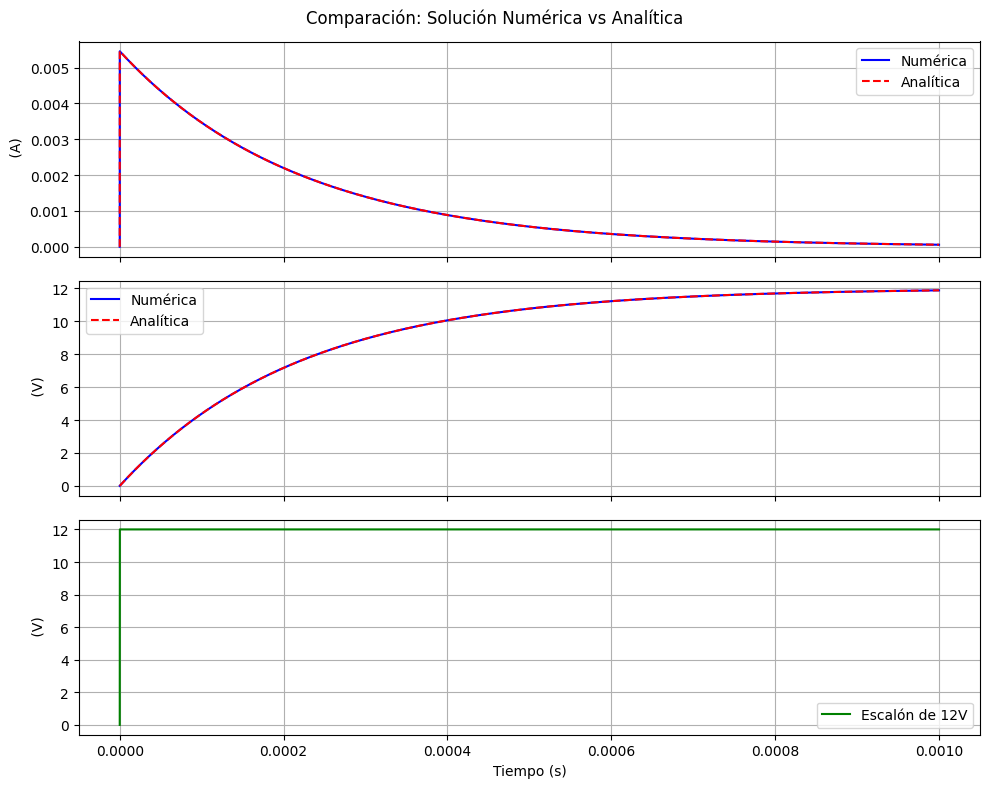

In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# ========== PARÁMETROS DE SIMULACIÓN ==========
h = 1e-9           # Paso de tiempo (1 ns)
t_simul = 1e-3     # Tiempo de simulación (10 µs)
R = 2.2e3          # Resistencia (2.2 kΩ)
L = 10e-6          # Inductancia (10 µH)
C = 100e-9         # Capacitancia (100 nF)

# ========== SOLUCIÓN NUMÉRICA ==========
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicialización de variables
x1 = np.zeros(int(t_simul / h))  # Corriente i(t)
x2 = np.zeros(int(t_simul / h))  # Tensión v(t)
u = np.zeros(int(t_simul / h))   # Entrada Va(t)
t = np.zeros(int(t_simul / h))   # Vector de tiempo

x = np.array([[0.0], [0.0]])     # Condiciones iniciales [i(0)=0, v(0)=0]
Va = 0                           # Voltaje inicial Va(0)=0

for ii in range(int(t_simul / h)):
    xp = np.matmul(A, x) + B * Va  # Derivada del estado
    x = x + xp * h                 # Integración Euler
    u[ii] = Va                     # Almacena Va(t)
    Va = 12                        # Escalón de 12V en t > 0
    x1[ii] = x[0, 0]               # Almacena i(t)
    x2[ii] = x[1, 0]               # Almacena v(t)
    t[ii] = ii * h                 # Almacena tiempo

# ========== SOLUCIÓN ANALÍTICA ==========
i_analitico = 0.00545477 * np.exp(-4545.55 * t) - 0.00545477 * np.exp(-2.19995e8 * t)
v_analitico = 12 + 0.000247949 * np.exp(-2.19995e8 * t) - 12.0002 * np.exp(-4545.55 * t)

# ========== GRÁFICAS ==========
fig, axs = plt.subplots(3, figsize=(10, 8), sharex=True)
fig.suptitle('Comparación: Solución Numérica vs Analítica')

# --- Gráfica 1: Corriente i(t) ---
axs[0].plot(t, x1, 'b-', linewidth=1.5, label='Numérica')
axs[0].plot(t, i_analitico, 'r--', linewidth=1.5, label='Analítica')
axs[0].set_ylabel(' (A)')
axs[0].grid(True)
axs[0].legend()

# --- Gráfica 2: Tensión v(t) ---
axs[1].plot(t, x2, 'b-', linewidth=1.5, label='Numérica')
axs[1].plot(t, v_analitico, 'r--', linewidth=1.5, label='Analítica')
axs[1].set_ylabel(' (V)')
axs[1].grid(True)
axs[1].legend()

# --- Gráfica 3: Entrada Va(t) ---
axs[2].plot(t, u, 'g-', linewidth=1.5, label='Escalón de 12V')
axs[2].set_ylabel(' (V)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

$i(t)$ alcanza rápidamente el valor $0 \text{ A}$ y $V_C(t)$ alcanzará rápidamente el valor $12 \text{ V}$, por ser el sistema sobreamortiguado con $\zeta = 110 \gg 1$.


3- Asumir que la tensión de entrada cambia de signo cada 1ms.

Se considera R= 2200 Ω, L=10-5 H, C=10-7 y 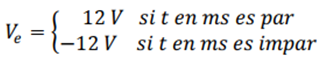

Para 0 < t < 1 ms se tiene la solución ya encontrada
Para el intervalo 1 ≤ t < 2 ms, y los siguientes, se deben tener en cuenta como condiciones iniciales los valores finales de i(t) y v(t) del intervalo anterior.


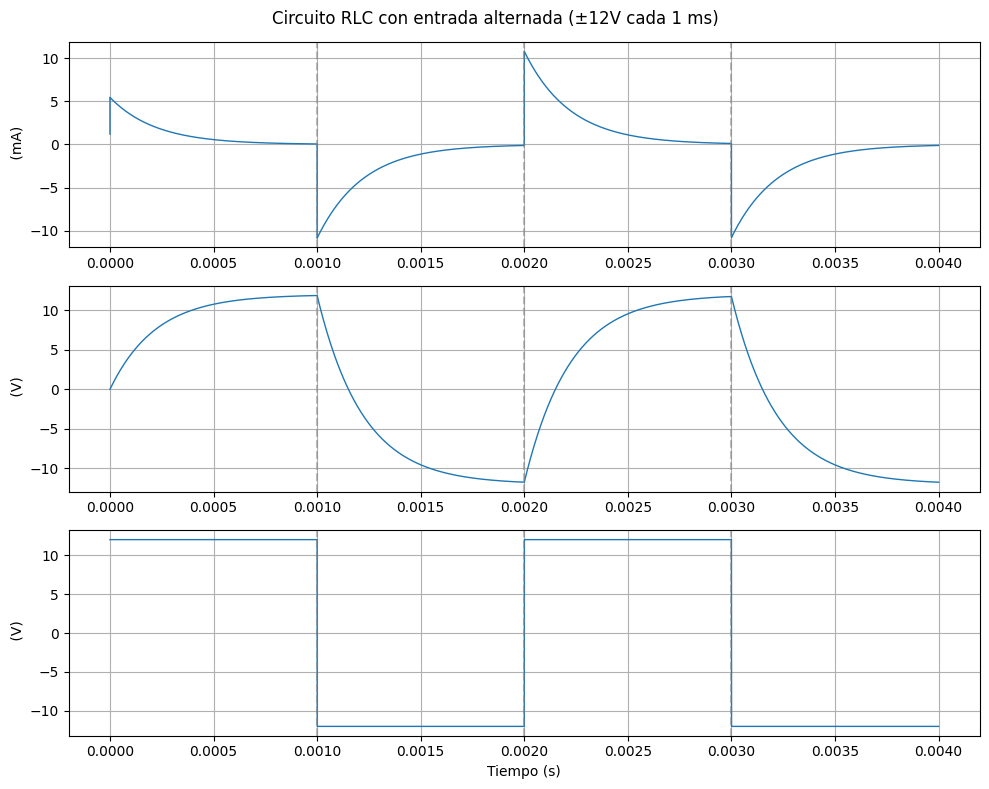

In [40]:
# @title
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
warnings.filterwarnings("ignore", category=DeprecationWarning, module='numpy')

h = 1e-9  # Paso de tiempo
t_simul = 4e-3  # Extendemos la simulación a 4 ms para ver 2 ciclos completos
R = 2.2e3  # 2.2 kOhm
L = 10e-6  # 10 microHenrios
C = 100e-9  # 100 nF

# Matrices del sistema
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicialización de variables
x1 = np.linspace(0, 0, int(t_simul/h))  # Corriente (i_L)
x2 = np.linspace(0, 0, int(t_simul/h))  # Voltaje en capacitor (v_c)
u = np.linspace(0, 0, int(t_simul/h))   # Voltaje de entrada (V_a)
t = np.linspace(0, 0, int(t_simul/h))   # Vector de tiempo

# Condiciones iniciales
Va = 12  # Voltaje inicial (empezamos con +12V)
x = np.array([[0], [0]])  # [i_L(0); v_c(0)]
xp = np.array([[0], [0]])

# Simulación
for ii in range(int(t_simul/h)):
    # Cambio de polaridad cada 1 ms
    if ii * h >= 1e-3 and ii * h < 2e-3:
        Va = -12
    elif ii * h >= 2e-3 and ii * h < 3e-3:
        Va = 12
    elif ii * h >= 3e-3:
        Va = -12

    # Integración del sistema
    xp = np.matmul(A, x) + B * Va
    x = x + xp * h

    # Almacenamiento de resultados
    u[ii] = Va
    x1[ii] = x[0]  # Corriente i_L
    x2[ii] = x[1]  # Voltaje v_c
    t[ii] = ii * h

# Gráficos
fig, axs = plt.subplots(3, figsize=(10, 8))
fig.suptitle('Circuito RLC con entrada alternada (±12V cada 1 ms)')

# Corriente en el inductor
axs[0].plot(t, x1 * 1000, linewidth=1.0)  # Convertimos a mA
axs[0].grid(True)
axs[0].set_ylabel(' (mA)')

# Voltaje en el capacitor
axs[1].plot(t, x2, linewidth=1.0)
axs[1].set_ylabel(' (V)')
axs[1].grid(True)

# Voltaje de entrada
axs[2].plot(t, u, linewidth=1.0)
axs[2].grid(True)
axs[2].set_ylabel(' (V)')
axs[2].set_xlabel('Tiempo (s)')

# Líneas verticales para marcar los cambios
for ms in [1e-3, 2e-3, 3e-3]:
    axs[0].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)
    axs[1].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)
    axs[2].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
show()


Se observa la variación de i(t) y de vc(t) cada 1 ms, con un cambio de signo y el comportamiento sobreamortiguado.

Ejercicio 2. Cálculo simbólico de linealización de sistemas dinámicos
Se propone implementar simbólicamente las expresiones de Taylor para el caso de un sistema dinámico con varias variables de estado.

Sea el sistema dinámico no lineal expresado en variables de estado dado por


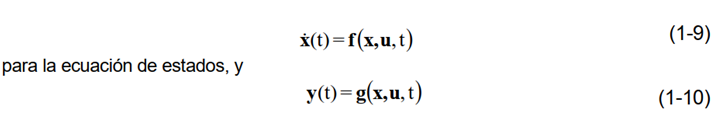

para la ecuación de salida, se pretende hallar una expresión lineal del mismo.

Para ello, si las funciones $f$ y $g$ fuesen vectoriales, lo cual significa que $Y \in \mathbb{R}^m$, $X \in \mathbb{R}^n$ y $U \in \mathbb{R}^r$ tienen varias componentes, entonces se emplean las siguientes expresiones para el cálculo del modelo linealizado:

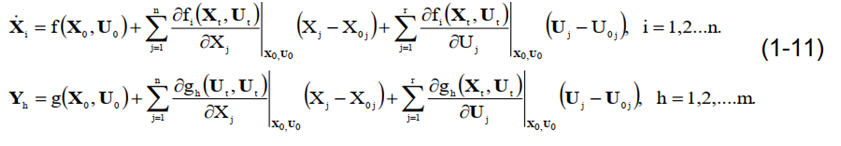

La (1-11) toma la forma

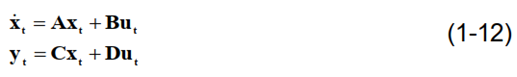

con x0=x(0), donde A, B, C y D son matrices.

Ejercicio 2. Actividad integradora

Sabiendo que un sistema lineal en variables de estado tiene la representación

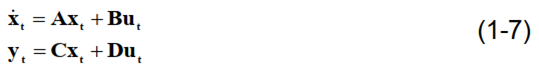

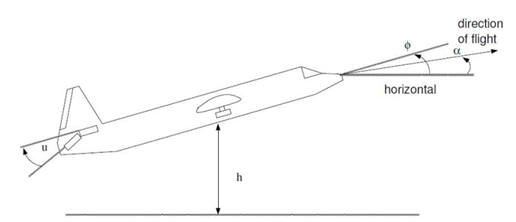

Fig. 1-3. Modelo de sistema de altitud en un avión

Para el caso de la Fig. 1-3, modelo válido sólo para pequeños ángulos, se tiene

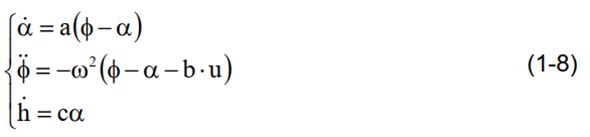

donde $\omega > 0$ representa la frecuencia natural, y los coeficientes $a$, $b$ son constantes positivas. $u$ es la variable manipulada y es proporcional a la posición de los elevadores. $\phi$ (ángulo de cabeceo) en radianes. El vehículo vuela a $c$ metros por segundo, su trayectoria de vuelo forma un ángulo $\alpha$ con la horizontal (si $\alpha > 0$ sube, si $\alpha < 0$ desciende). Elegir $x_1=\alpha$, $x_2=\phi$, $x_3=\dot{\alpha}$ y $x_4=h$. Se pide:

1. Obtener el sistema lineal en variables de estado para el equilibrio $x = [0 \ 0 \ 0 \ 0]^T$.



In [10]:
# @title
import sympy as sp
import numpy as np

# --- 1. Definir las variables simbólicas ---
# Estados
alpha, phi, phidot, h = sp.symbols('alpha phi phidot h') # phidot es d(phi)/dt
x_sym = sp.Matrix([alpha, phi, phidot, h])

# Entrada
u = sp.symbols('u')

# Constantes del sistema
a, b, c, omega = sp.symbols('a b c omega', positive=True) # positive=True para indicar que son positivas

print("Variables de estado simbólicas (x):")
print(x_sym)
print("\nVariable de entrada simbólica (u):")
print(u)
print("\nConstantes del sistema simbólicas:")
print(f"a = {a}, b = {b}, c = {c}, omega = {omega}")

# --- 2. Definir las ecuaciones del sistema (como un vector de derivadas de estado) ---
# Recordar que nuestras ecuaciones son:
# 1. d(alpha)/dt = a*(phi - alpha)
# 2. d(phi)/dt = phidot (esto es una definición de estado)
# 3. d(phidot)/dt = -omega**2 * (phi - alpha - b * u)
# 4. d(h)/dt = c * alpha

# F_x es el vector de las funciones de estado (lado derecho de dx/dt = f(x, u))
# Cada elemento de F_x corresponde a la derivada de cada estado en x_sym
F_x = sp.Matrix([
    a * (phi - alpha),
    phidot,
    -omega**2 * (phi - alpha - b * u),
    c * alpha
])

print("\nVector de funciones de estado (F(x,u)):")
print(F_x)

# --- 3. Calcular la Matriz A (Jacobiano de F_x respecto a x_sym) ---
# A = d(F_x) / d(x_sym)
A_sym = F_x.jacobian(x_sym)

print("\nMatriz A (simbólica):")
display(A_sym) # Usar display para una mejor visualización en Colab

# --- 4. Calcular la Matriz B (Jacobiano de F_x respecto a u) ---
# B = d(F_x) / d(u)
B_sym = F_x.jacobian(sp.Matrix([u])) # Asegurarse de que u sea una matriz para jacobian

print("\nMatriz B (simbólica):")
display(B_sym)

# --- 5. Definir las matrices C y D (para el caso donde las salidas son los mismos estados) ---
# Si y = x, entonces C es la matriz identidad y D es la matriz de ceros.
C_sym = sp.eye(len(x_sym)) # Matriz identidad del tamaño del vector de estado
D_sym = sp.zeros(len(x_sym), len(sp.Matrix([u]))) # Matriz de ceros con dimensiones adecuadas

print("\nMatriz C (simbólica):")
display(C_sym)

print("\nMatriz D (simbólica):")
display(D_sym)

print("\n--- Sistema Lineal en Variables de Estado (Simbólico) ---")
print(f"Vector de Estado (x): {x_sym.T}") # .T para mostrar como fila
print(f"Vector de Entrada (u): {u}")

print("\nMatrices obtenidas:")
print("A =")
display(A_sym)
print("B =")
display(B_sym)
print("C =")
display(C_sym)
print("D =")
display(D_sym)

# --- Verificación del equilibrio x = [0 0 0 0]T ---
print("\n--- Verificación del Equilibrio x = [0 0 0 0]T ---")
# Sustituir x = 0 en F_x
F_x_at_zero = F_x.subs({alpha: 0, phi: 0, phidot: 0, h: 0})
print("F(x,u) evaluado en x = [0 0 0 0]T:")
display(F_x_at_zero)

# Para que F_x_at_zero sea cero (es decir, dx/dt = 0), necesitamos que:
# 0 = a * (0 - 0) --> 0 = 0 (siempre cierto)
# 0 = 0 (siempre cierto)
# 0 = -omega**2 * (0 - 0 - b * u) --> 0 = omega**2 * b * u
# 0 = c * 0 --> 0 = 0 (siempre cierto)

# De 0 = omega**2 * b * u, como omega > 0 y b > 0, se deduce que u debe ser 0.
print(f"\nPara que x = [0 0 0 0]T sea un punto de equilibrio, se requiere que u = {sp.solve(omega**2 * b * u, u)[0]}")
print("Esto confirma que el modelo lineal ya está centrado alrededor de este punto de equilibrio (si u=0).")

Variables de estado simbólicas (x):
Matrix([[alpha], [phi], [phidot], [h]])

Variable de entrada simbólica (u):
u

Constantes del sistema simbólicas:
a = a, b = b, c = c, omega = omega

Vector de funciones de estado (F(x,u)):
Matrix([[a*(-alpha + phi)], [phidot], [-omega**2*(-alpha - b*u + phi)], [alpha*c]])

Matriz A (simbólica):


⎡-a   a   0  0⎤
⎢             ⎥
⎢0    0   1  0⎥
⎢             ⎥
⎢ 2    2      ⎥
⎢ω   -ω   0  0⎥
⎢             ⎥
⎣c    0   0  0⎦


Matriz B (simbólica):


⎡ 0  ⎤
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢   2⎥
⎢b⋅ω ⎥
⎢    ⎥
⎣ 0  ⎦


Matriz C (simbólica):


⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦


Matriz D (simbólica):


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


--- Sistema Lineal en Variables de Estado (Simbólico) ---
Vector de Estado (x): Matrix([[alpha, phi, phidot, h]])
Vector de Entrada (u): u

Matrices obtenidas:
A =


⎡-a   a   0  0⎤
⎢             ⎥
⎢0    0   1  0⎥
⎢             ⎥
⎢ 2    2      ⎥
⎢ω   -ω   0  0⎥
⎢             ⎥
⎣c    0   0  0⎦

B =


⎡ 0  ⎤
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢   2⎥
⎢b⋅ω ⎥
⎢    ⎥
⎣ 0  ⎦

C =


⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

D =


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


--- Verificación del Equilibrio x = [0 0 0 0]T ---
F(x,u) evaluado en x = [0 0 0 0]T:


⎡  0   ⎤
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢   2  ⎥
⎢b⋅ω ⋅u⎥
⎢      ⎥
⎣  0   ⎦


Para que x = [0 0 0 0]T sea un punto de equilibrio, se requiere que u = 0
Esto confirma que el modelo lineal ya está centrado alrededor de este punto de equilibrio (si u=0).


1. Obtener la solución numérica del sistema lineal para evaluar cuantitativamente el comportamiento con intención de verificar el correcto planteo. Para hacerlo, se le asignan los valores siguientes a los parámetros: $\omega=0.2$; $a=0.01$; $b=2$; $c=100 \text{ m/s}$ (es decir, $360 \text{ Km/h}$); $\Delta t=10^{-3}$; y el tiempo de simulación de $5 \text{ segundos}$.


Parámetros asignados: 
omega = 0.2, a = 0.01, b = 2, c = 100

Matriz A (numérica):
[[-1.e-02  1.e-02  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  1.e+00  0.e+00]
 [ 4.e-02 -4.e-02  0.e+00  0.e+00]
 [ 1.e+02  0.e+00  0.e+00  0.e+00]]

Matriz B (numérica):
[[0.  ]
 [0.  ]
 [0.08]
 [0.  ]]

Matriz C (numérica):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Matriz D (numérica):
[[0.]
 [0.]
 [0.]
 [0.]]

Condiciones iniciales (x0 = [alpha, phi, phidot, h]): [0.01 0.05 0.   0.  ]

Señal de entrada (u): Escalón de 0.1 rad a los 1.0 segundos.


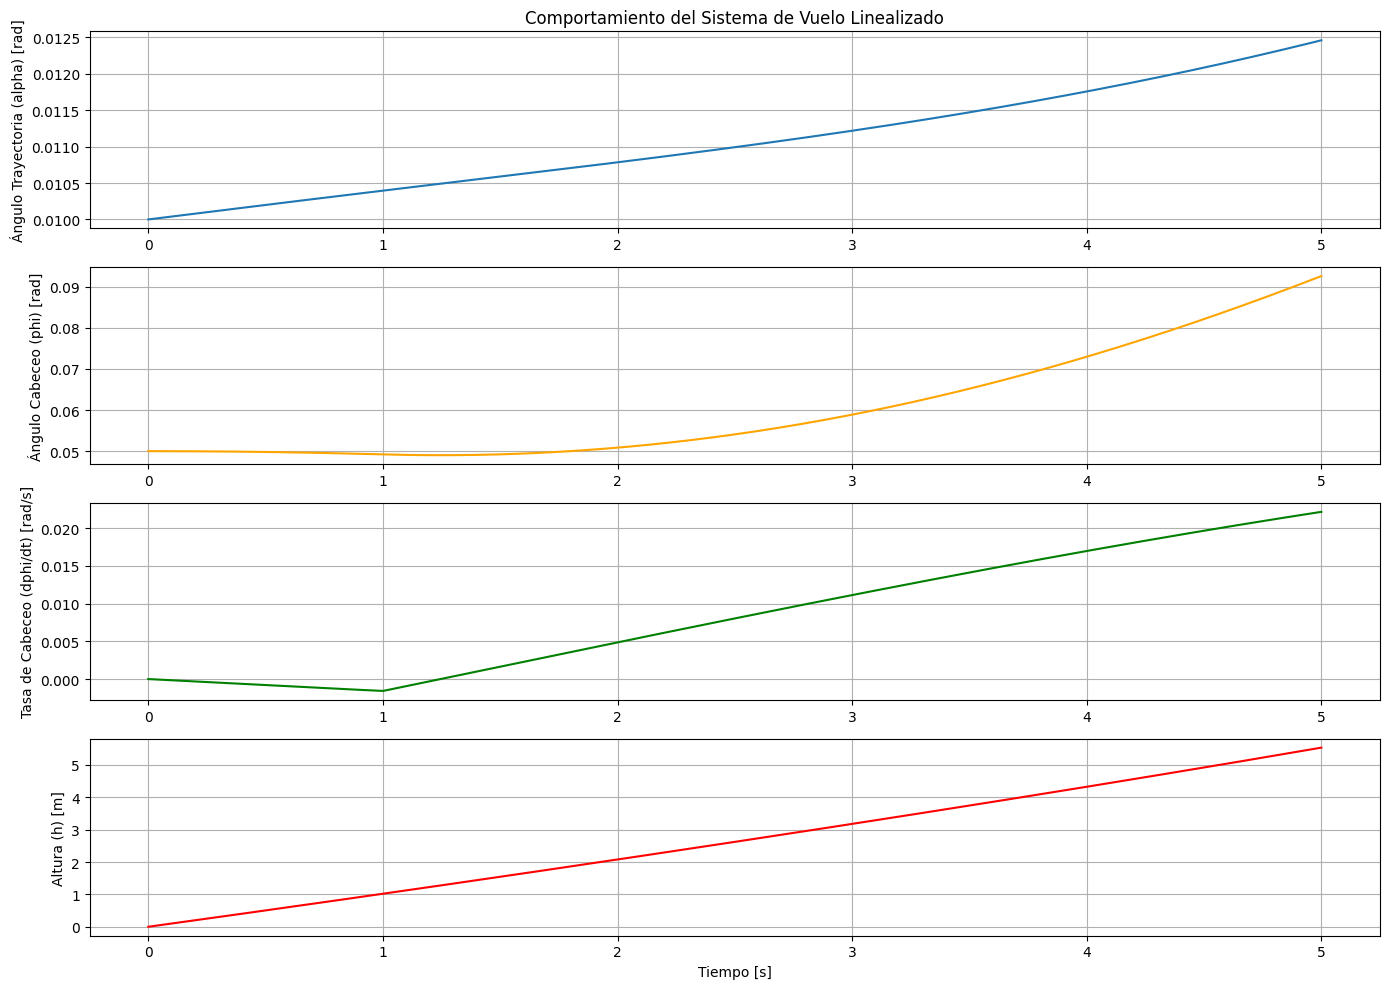


--- Análisis de los resultados ---
Observaciones típicas (dependiendo de los parámetros):
- **Alpha (Ángulo de Trayectoria):** Un cambio en el elevador (u) o en el cabeceo (phi) debería afectar la trayectoria.
- **Phi (Ángulo de Cabeceo):** La deflexión del elevador (u) influye directamente en la dinámica de cabeceo (phidot).
- **Phidot (Tasa de Cabeceo):** Esta variable mostrará la velocidad de rotación alrededor del eje lateral. Debería estabilizarse si el sistema es estable.
- **H (Altura):** Dado que d(h)/dt = c*alpha, la altitud cambiará en función del ángulo de trayectoria de vuelo (alpha) y la velocidad del avión (c).

Altura final a los 5 segundos: 5.54 metros
Ángulo de trayectoria final (alpha) a los 5 segundos: 0.0125 radianes
Ángulo de cabeceo final (phi) a los 5 segundos: 0.0926 radianes
Tasa de cabeceo final (dphi/dt) a los 5 segundos: 0.0222 rad/s


In [11]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definir los valores numéricos de los parámetros ---
omega_val = 0.2
a_val = 0.01
b_val = 2
c_val = 100

print(f"Parámetros asignados: \nomega = {omega_val}, a = {a_val}, b = {b_val}, c = {c_val}")

# --- 2. Sustituir los valores en las matrices A, B, C, D ---
# Las matrices simbólicas obtenidas fueron:
# A = [[-a, a, 0, 0],
#      [0, 0, 1, 0],
#      [omega**2, -omega**2, 0, 0],
#      [c, 0, 0, 0]]

# B = [[0],
#      [0],
#      [omega**2 * b],
#      [0]]

# C = [[1, 0, 0, 0],
#      [0, 1, 0, 0],
#      [0, 0, 1, 0],
#      [0, 0, 0, 1]]

# D = [[0],
#      [0],
#      [0],
#      [0]]

A_num = np.array([
    [-a_val, a_val, 0, 0],
    [0, 0, 1, 0],
    [omega_val**2, -omega_val**2, 0, 0],
    [c_val, 0, 0, 0]
])

B_num = np.array([
    [0],
    [0],
    [omega_val**2 * b_val],
    [0]
])

C_num = np.identity(4) # Matriz identidad de 4x4
D_num = np.zeros((4, 1)) # Matriz de ceros de 4x1

print("\nMatriz A (numérica):")
print(A_num)
print("\nMatriz B (numérica):")
print(B_num)
print("\nMatriz C (numérica):")
print(C_num)
print("\nMatriz D (numérica):")
print(D_num)

# --- 3. Crear el objeto de sistema de espacio de estados ---
sys_num = signal.StateSpace(A_num, B_num, C_num, D_num)

# --- 4. Definir el tiempo de simulación y el paso de tiempo ---
sim_time = 5 # segundos
dt = 1e-3 # segundos
num_points = int(sim_time / dt) + 1
t = np.linspace(0, sim_time, num_points)

# --- 5. Definir las condiciones iniciales ---
# x = [alpha, phi, phidot, h]
# Asumimos una perturbación inicial en el ángulo de cabeceo (phi)
# y una pequeña perturbación en el ángulo de trayectoria (alpha)
x0 = np.array([0.01, 0.05, 0.0, 0.0]) # alpha=0.01 rad, phi=0.05 rad, phidot=0, h=0

print(f"\nCondiciones iniciales (x0 = [alpha, phi, phidot, h]): {x0}")

# --- 6. Definir la señal de entrada u(t) ---
# Elevador inicialmente en cero, luego un escalón de 0.1 rad a los 1 segundo
u_input = np.zeros(num_points)
# Índice de tiempo donde se aplica el escalón
idx_step = int(1.0 / dt)
u_input[idx_step:] = 0.1 # Elevador se deflecta 0.1 radianes

print(f"\nSeñal de entrada (u): Escalón de {u_input[idx_step]} rad a los {t[idx_step]} segundos.")

# --- 7. Simular el sistema ---
tout, yout, xout = signal.lsim(sys_num, U=u_input, T=t, X0=x0)

# Las columnas de xout son: alpha, phi, phidot, h
alpha_out = xout[:, 0]
phi_out = xout[:, 1]
phidot_out = xout[:, 2]
h_out = xout[:, 3]

# --- 8. Graficar los resultados ---
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(tout, alpha_out)
plt.title('Comportamiento del Sistema de Vuelo Linealizado')
plt.ylabel('Ángulo Trayectoria (alpha) [rad]')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tout, phi_out, color='orange')
plt.ylabel('Ángulo Cabeceo (phi) [rad]')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tout, phidot_out, color='green')
plt.ylabel('Tasa de Cabeceo (dphi/dt) [rad/s]')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tout, h_out, color='red')
plt.xlabel('Tiempo [s]')
plt.ylabel('Altura (h) [m]')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- Análisis de los resultados ---")
print("Observaciones típicas (dependiendo de los parámetros):")
print("- **Alpha (Ángulo de Trayectoria):** Un cambio en el elevador (u) o en el cabeceo (phi) debería afectar la trayectoria.")
print("- **Phi (Ángulo de Cabeceo):** La deflexión del elevador (u) influye directamente en la dinámica de cabeceo (phidot).")
print("- **Phidot (Tasa de Cabeceo):** Esta variable mostrará la velocidad de rotación alrededor del eje lateral. Debería estabilizarse si el sistema es estable.")
print("- **H (Altura):** Dado que d(h)/dt = c*alpha, la altitud cambiará en función del ángulo de trayectoria de vuelo (alpha) y la velocidad del avión (c).")
print(f"\nAltura final a los {sim_time} segundos: {h_out[-1]:.2f} metros")
print(f"Ángulo de trayectoria final (alpha) a los {sim_time} segundos: {alpha_out[-1]:.4f} radianes")
print(f"Ángulo de cabeceo final (phi) a los {sim_time} segundos: {phi_out[-1]:.4f} radianes")
print(f"Tasa de cabeceo final (dphi/dt) a los {sim_time} segundos: {phidot_out[-1]:.4f} rad/s")

3. Obtener la solución numérica del sistema lineal para $c=50 \text{ m/s}$ (es decir, $180 \text{ Km/h}$), $\Delta t=10^{-3}$; y el tiempo de simulación de $20 \text{ segundos}$.


Parámetros asignados: 
omega = 0.2, a = 0.01, b = 2, c = 50.0

Matriz A (numérica):
[[-1.e-02  1.e-02  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  1.e+00  0.e+00]
 [ 4.e-02 -4.e-02  0.e+00  0.e+00]
 [ 5.e+01  0.e+00  0.e+00  0.e+00]]

Matriz B (numérica):
[[0.  ]
 [0.  ]
 [0.08]
 [0.  ]]

Matriz C (numérica):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Matriz D (numérica):
[[0.]
 [0.]
 [0.]
 [0.]]

Condiciones iniciales (x0 = [alpha, phi, phidot, h]): [0.01 0.05 0.   0.  ]

Señal de entrada (u): Escalón de 0.1 rad a los 1.0 segundos.


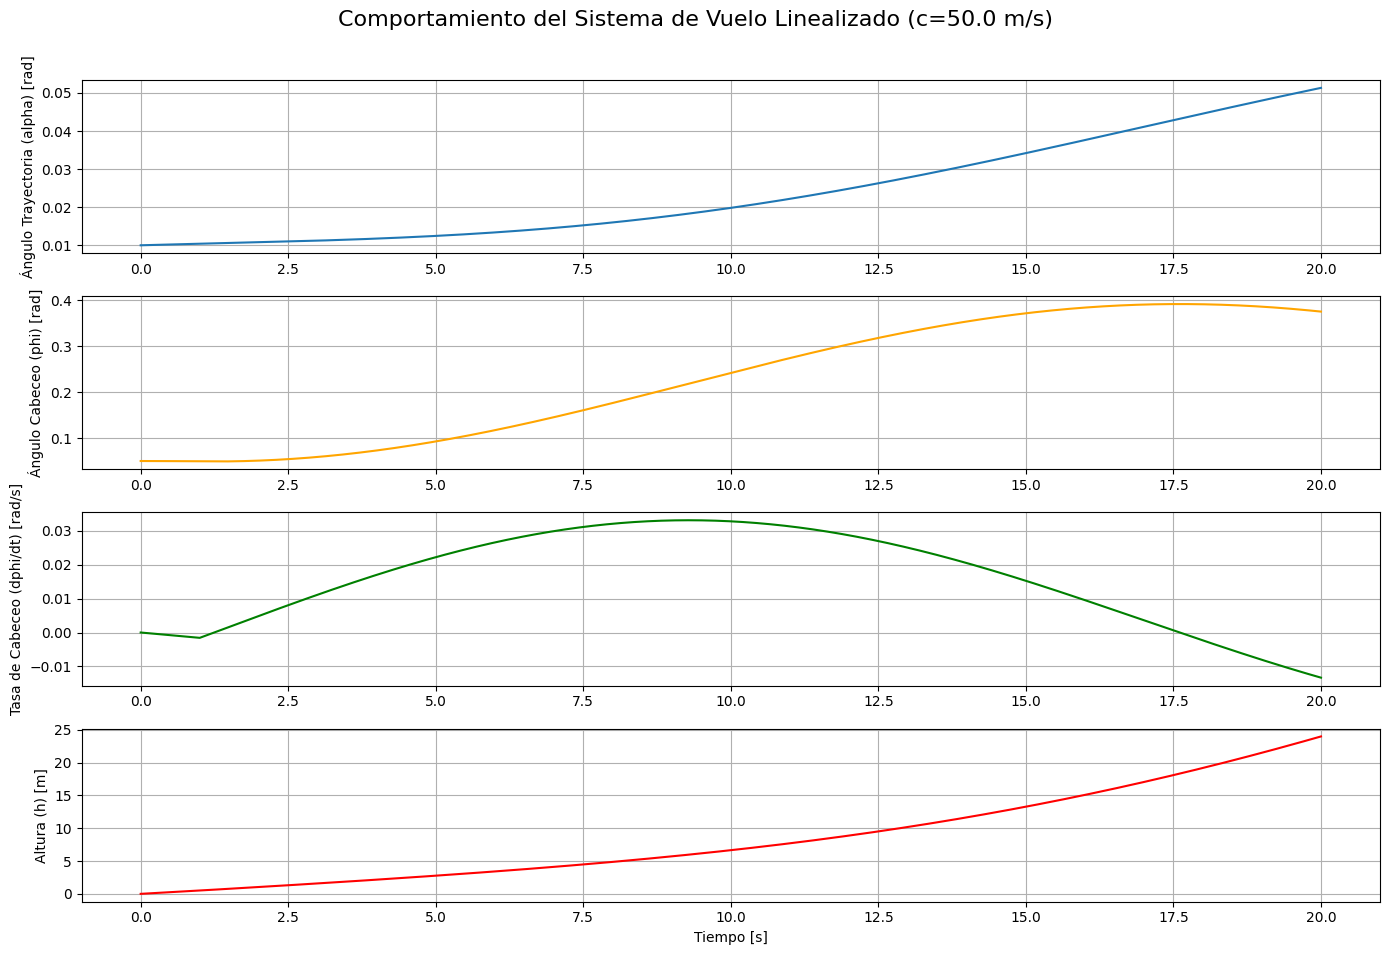


--- Análisis de los resultados ---
Altura final a los 20 segundos: 23.99 metros
Ángulo de trayectoria final (alpha) a los 20 segundos: 0.0513 radianes
Ángulo de cabeceo final (phi) a los 20 segundos: 0.3751 radianes
Tasa de cabeceo final (dphi/dt) a los 20 segundos: -0.0133 rad/s

Observaciones clave al comparar con la simulación anterior:
- La principal diferencia se verá en la evolución de la ALTURA (h).
- Como d(h)/dt = c*alpha, y ahora 'c' es la mitad, la tasa de cambio de la altitud será menor para el mismo 'alpha'.
- Esto significa que el cambio total en la altitud a lo largo del tiempo de simulación será menos pronunciado o tomará más tiempo para alcanzar
un cambio significativo, asumiendo que el comportamiento de 'alpha' no cambia drásticamente.
- El tiempo de simulación extendido a 20 segundos permitirá observar mejor la dinámica de estabilización o el comportamiento a largo plazo.


In [41]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definir los valores numéricos de los parámetros ---
omega_val = 0.2
a_val = 0.01
b_val = 2
c_val = 50.0

print(f"Parámetros asignados: \nomega = {omega_val}, a = {a_val}, b = {b_val}, c = {c_val}")

# --- 2. Sustituir los valores en las matrices A, B, C, D ---
# Las matrices simbólicas obtenidas fueron:
# A = [[-a, a, 0, 0],
#      [0, 0, 1, 0],
#      [omega**2, -omega**2, 0, 0],
#      [c, 0, 0, 0]]

# B = [[0],
#      [0],
#      [omega**2 * b],
#      [0]]

# C = [[1, 0, 0, 0],
#      [0, 1, 0, 0],
#      [0, 0, 1, 0],
#      [0, 0, 0, 1]]

# D = [[0],
#      [0],
#      [0],
#      [0]]

A_num = np.array([
    [-a_val, a_val, 0, 0],
    [0, 0, 1, 0],
    [omega_val**2, -omega_val**2, 0, 0],
    [c_val, 0, 0, 0]
])

B_num = np.array([
    [0],
    [0],
    [omega_val**2 * b_val],
    [0]
])

C_num = np.identity(4) # Matriz identidad de 4x4
D_num = np.zeros((4, 1)) # Matriz de ceros de 4x1

print("\nMatriz A (numérica):")
print(A_num)
print("\nMatriz B (numérica):")
print(B_num)
print("\nMatriz C (numérica):")
print(C_num)
print("\nMatriz D (numérica):")
print(D_num)

# --- 3. Crear el objeto de sistema de espacio de estados ---
sys_num = signal.StateSpace(A_num, B_num, C_num, D_num)

# --- 4. Definir el tiempo de simulación y el paso de tiempo ---
sim_time = 20 # ¡NUEVO TIEMPO DE SIMULACIÓN!
dt = 1e-3 # segundos
num_points = int(sim_time / dt) + 1
t = np.linspace(0, sim_time, num_points)

# --- 5. Definir las condiciones iniciales ---
# x = [alpha, phi, phidot, h]
# Mismas condiciones iniciales que antes
x0 = np.array([0.01, 0.05, 0.0, 0.0]) # alpha=0.01 rad, phi=0.05 rad, phidot=0, h=0

print(f"\nCondiciones iniciales (x0 = [alpha, phi, phidot, h]): {x0}")

# --- 6. Definir la señal de entrada u(t) ---
# Elevador inicialmente en cero, luego un escalón de 0.1 rad a los 1 segundo
u_input = np.zeros(num_points)
# Índice de tiempo donde se aplica el escalón
idx_step = int(1.0 / dt)
u_input[idx_step:] = 0.1 # Elevador se deflecta 0.1 radianes

print(f"\nSeñal de entrada (u): Escalón de {u_input[idx_step]} rad a los {t[idx_step]} segundos.")

# --- 7. Simular el sistema ---
tout, yout, xout = signal.lsim(sys_num, U=u_input, T=t, X0=x0)

# Las columnas de xout son: alpha, phi, phidot, h
alpha_out = xout[:, 0]
phi_out = xout[:, 1]
phidot_out = xout[:, 2]
h_out = xout[:, 3]

# --- 8. Graficar los resultados ---
plt.figure(figsize=(14, 10))
plt.suptitle(f'Comportamiento del Sistema de Vuelo Linealizado (c={c_val} m/s)', fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(tout, alpha_out)
plt.ylabel('Ángulo Trayectoria (alpha) [rad]')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tout, phi_out, color='orange')
plt.ylabel('Ángulo Cabeceo (phi) [rad]')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tout, phidot_out, color='green')
plt.ylabel('Tasa de Cabeceo (dphi/dt) [rad/s]')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tout, h_out, color='red')
plt.xlabel('Tiempo [s]')
plt.ylabel('Altura (h) [m]')
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Ajusta el espacio para el suptitle
plt.show()

print("\n--- Análisis de los resultados ---")
print(f"Altura final a los {sim_time} segundos: {h_out[-1]:.2f} metros")
print(f"Ángulo de trayectoria final (alpha) a los {sim_time} segundos: {alpha_out[-1]:.4f} radianes")
print(f"Ángulo de cabeceo final (phi) a los {sim_time} segundos: {phi_out[-1]:.4f} radianes")
print(f"Tasa de cabeceo final (dphi/dt) a los {sim_time} segundos: {phidot_out[-1]:.4f} rad/s")
print("\nObservaciones clave al comparar con la simulación anterior:")
print(f"- La principal diferencia se verá en la evolución de la ALTURA (h).")
print(f"- Como d(h)/dt = c*alpha, y ahora 'c' es la mitad, la tasa de cambio de la altitud será menor para el mismo 'alpha'.")
print(f"- Esto significa que el cambio total en la altitud a lo largo del tiempo de simulación será menos pronunciado o tomará más tiempo para alcanzar")
print(f"un cambio significativo, asumiendo que el comportamiento de 'alpha' no cambia drásticamente.")
print(f"- El tiempo de simulación extendido a 20 segundos permitirá observar mejor la dinámica de estabilización o el comportamiento a largo plazo.")

Ejercicio 3. Linealización de un sistema no lineal y verificación en
simulación numérica

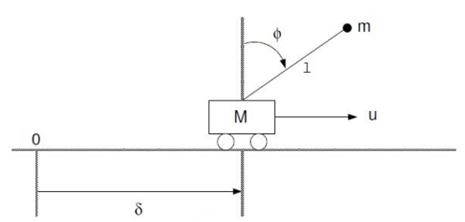

Para el caso del esquema del péndulo invertido de la Fig. 1-4 se tiene,

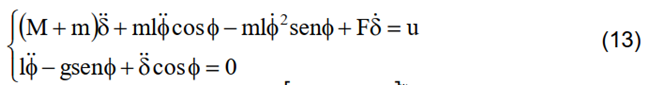

donde el sistema lineal en variables de estado $x = [\delta \ \dot{\delta} \ \phi \ \dot{\phi}]^T$, con los valores de los coeficientes de $m=0.1$; $F=0.1$; $l=0.6$; $g=9.8$; $M=0.5$ y $\Delta t=10^{-4} \text{ seg}$, tomando un tiempo de simulación de $5 \text{ segundos}$ con $u=0$.

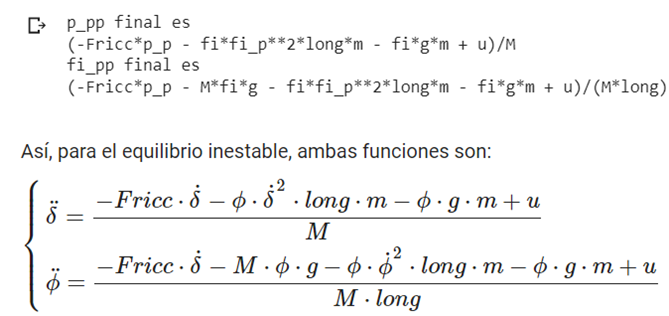

Fig. 1-5. Respuesta del Python en Colab el equilibrio inestable.
Se pide:

1. Obtener la versión linealizada en los equilibrios del sistema empleando el paquete de cálculo simbólico, tomando como referencia las instrucciones del Script de la Tabla 1-1. Se sugiere realizar la aproximación de las funciones coseno y seno por su variable correspondiente en el punto de operación, y luego mediante el *software* obtener las expresiones que se muestran en la Fig. 1-5, donde $\ddot{\phi}$ es fi_pp y $\ddot{\delta}$ es p_pp.


In [21]:
# @title
from sympy import symbols, pi, simplify, solve, diff, Matrix, pprint

# Declarar las variables simbólicas
fi, fi_p, fi_pp, p, p_p, p_pp = symbols('fi fi_p fi_pp p p_p p_pp')
M, m, u, long, Fricc, g = symbols('M m u long Fricc g')

print("Para el equilibrio estable")

# Valor del ángulo inicial en equilibrio
ang_inic = pi

# Ecuación para p_pp
p_pp_expr = (1 / (M + m)) * (u + m * long * fi_pp + m * long * fi_p**2 * (pi - fi) - Fricc * p_p)

# Ecuación para fi_pp, considerando sin(fi) ≈ pi - fi
fi_pp_expr = solve(fi_pp - (1 / long) * (g * (pi - fi) + p_pp_expr), fi_pp)[0]

print('fi_pp =')
pprint(simplify(fi_pp_expr))

# Sustituir fi_pp en p_pp
p_pp_expr = p_pp_expr.subs(fi_pp, fi_pp_expr)

print('p_pp =')
pprint(simplify(p_pp_expr))

# Evaluar derivadas para construir la matriz A, alrededor del punto de equilibrio
subs_dict = {p: 0, p_p: 0, fi: ang_inic, fi_p: 0}

A_row2 = [
    simplify(diff(p_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]
A_row4 = [
    simplify(diff(fi_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]

# Matriz A final
Mat_A = Matrix([
    [0, 1, 0, 0],
    A_row2,
    [0, 0, 0, 1],
    A_row4
])

print("Matriz A =")
pprint(Mat_A)


Para el equilibrio estable
fi_pp =
                                       2                            
-Fricc⋅pₚ - M⋅g⋅(fi - π) - fi⋅g⋅m - fiₚ ⋅long⋅m⋅(fi - π) + π⋅g⋅m + u
────────────────────────────────────────────────────────────────────
                               M⋅long                               
p_pp =
                  2                        2                   
-Fricc⋅pₚ - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + π⋅g⋅m + u
───────────────────────────────────────────────────────────────
                               M                               
Matriz A =
⎡0     1         0       0⎤
⎢                         ⎥
⎢   -Fricc     -g⋅m       ⎥
⎢0  ───────    ─────     0⎥
⎢      M         M        ⎥
⎢                         ⎥
⎢0     0         0       1⎥
⎢                         ⎥
⎢   -Fricc   g⋅(-M - m)   ⎥
⎢0  ───────  ──────────  0⎥
⎣   M⋅long     M⋅long     ⎦


In [22]:
# @title
from sympy import symbols, pi, simplify, solve, diff, Matrix, pprint

# Declarar las variables simbólicas
fi, fi_p, fi_pp, p, p_p, p_pp = symbols('fi fi_p fi_pp p p_p p_pp')
M, m, u, long, Fricc, g = symbols('M m u long Fricc g')

print("Para el equilibrio inestable")

# Ángulo de equilibrio inestable
ang_inic = 0

# Ecuación para p_pp (sin aproximación aún)
p_pp_expr = (1 / (M + m)) * (u + m * long * fi_pp + m * long * fi_p**2 * (pi - fi) - Fricc * p_p)

# Aproximación: sin(fi) ≈ fi, cos(fi) ≈ 1 => fi_pp = (1/long) * (-g * fi + p_pp)
fi_pp_expr = solve(fi_pp - (1 / long) * (-g * fi + p_pp_expr), fi_pp)[0]

print('fi_pp =')
pprint(simplify(fi_pp_expr))

# Sustituir fi_pp en p_pp
p_pp_expr = p_pp_expr.subs(fi_pp, fi_pp_expr)

print('p_pp =')
pprint(simplify(p_pp_expr))

# Evaluar en el punto de equilibrio
subs_dict = {p: 0, p_p: 0, fi: ang_inic, fi_p: 0}

# Matriz A: derivadas parciales respecto de [p, p_p, fi, fi_p]
A_row2 = [
    simplify(diff(p_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]
A_row4 = [
    simplify(diff(fi_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]

# Matriz B: derivadas parciales respecto de la entrada u
B_row2 = simplify(diff(p_pp_expr, u).subs(subs_dict))
B_row4 = simplify(diff(fi_pp_expr, u).subs(subs_dict))

# Matrices A y B
Mat_A = Matrix([
    [0, 1, 0, 0],
    A_row2,
    [0, 0, 0, 1],
    A_row4
])

Mat_B = Matrix([
    [0],
    [B_row2],
    [0],
    [B_row4]
])

print('Matriz A =')
pprint(Mat_A)

print('Matriz B =')
pprint(Mat_B)


Para el equilibrio inestable
fi_pp =
                                 2                    
-Fricc⋅pₚ - M⋅fi⋅g - fi⋅g⋅m - fiₚ ⋅long⋅m⋅(fi - π) + u
──────────────────────────────────────────────────────
                        M⋅long                        
p_pp =
                  2                        2           
-Fricc⋅pₚ - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + u
───────────────────────────────────────────────────────
                           M                           
Matriz A =
⎡0     1         0       0⎤
⎢                         ⎥
⎢   -Fricc     -g⋅m       ⎥
⎢0  ───────    ─────     0⎥
⎢      M         M        ⎥
⎢                         ⎥
⎢0     0         0       1⎥
⎢                         ⎥
⎢   -Fricc   g⋅(-M - m)   ⎥
⎢0  ───────  ──────────  0⎥
⎣   M⋅long     M⋅long     ⎦
Matriz B =
⎡  0   ⎤
⎢      ⎥
⎢  1   ⎥
⎢  ─   ⎥
⎢  M   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢  1   ⎥
⎢──────⎥
⎣M⋅long⎦


1. Obtener simulaciones del sistema (13) en las condiciones iniciales $x_0 = [0 \ 0 \ -0.01 \ 0]^T$ y $x_0 = [0 \ 0 \ 3.2 \ 0]^T$, empleando una integración Euler con $\Delta t=10^{-4}$. El tiempo de simulación será de $10 \text{ segundos}$ en cada caso, con $u=0$.

Para el equilibrio estable

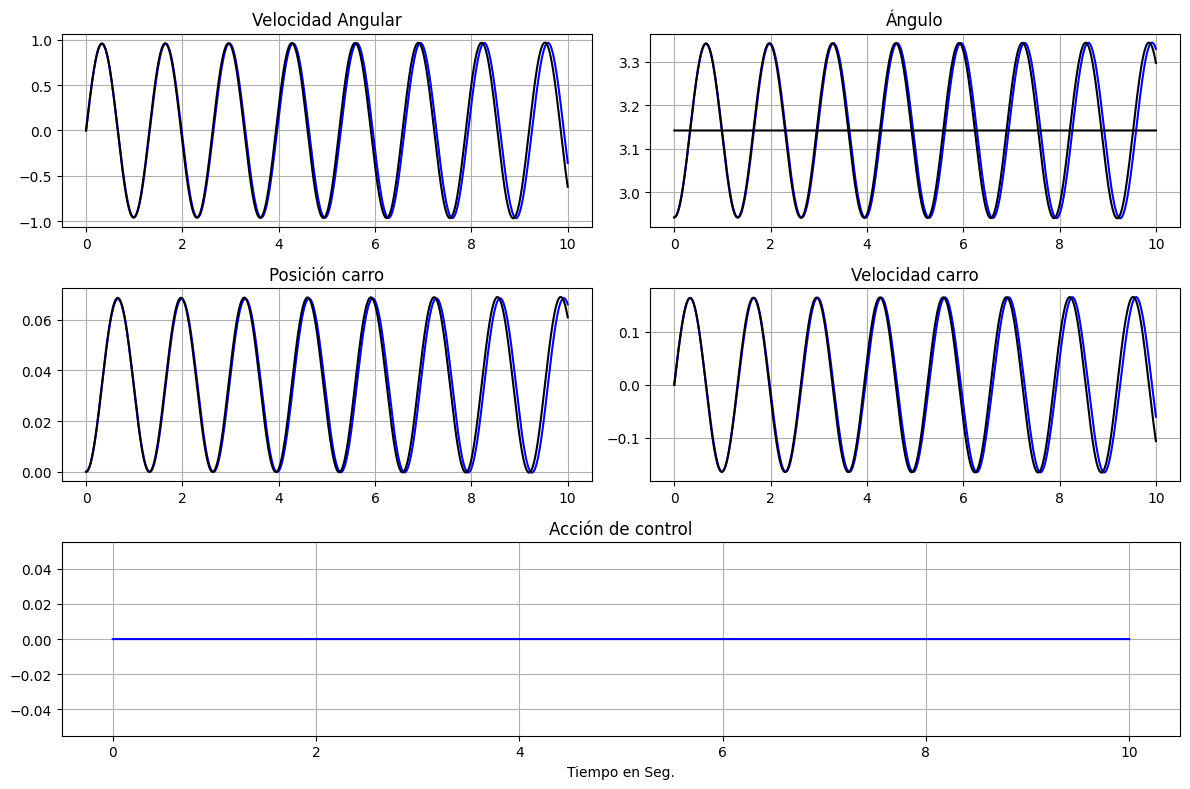

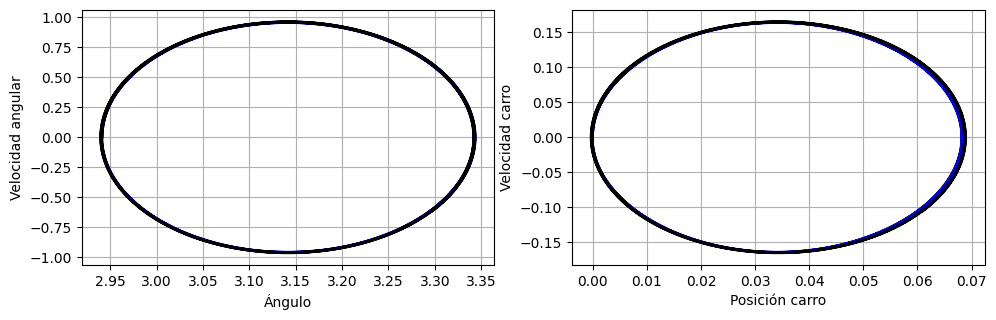

TCalculo = 6.2064878940582275 segundos


In [20]:
# @title
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.2
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi - 0.2
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

Para el equilibrio inestable

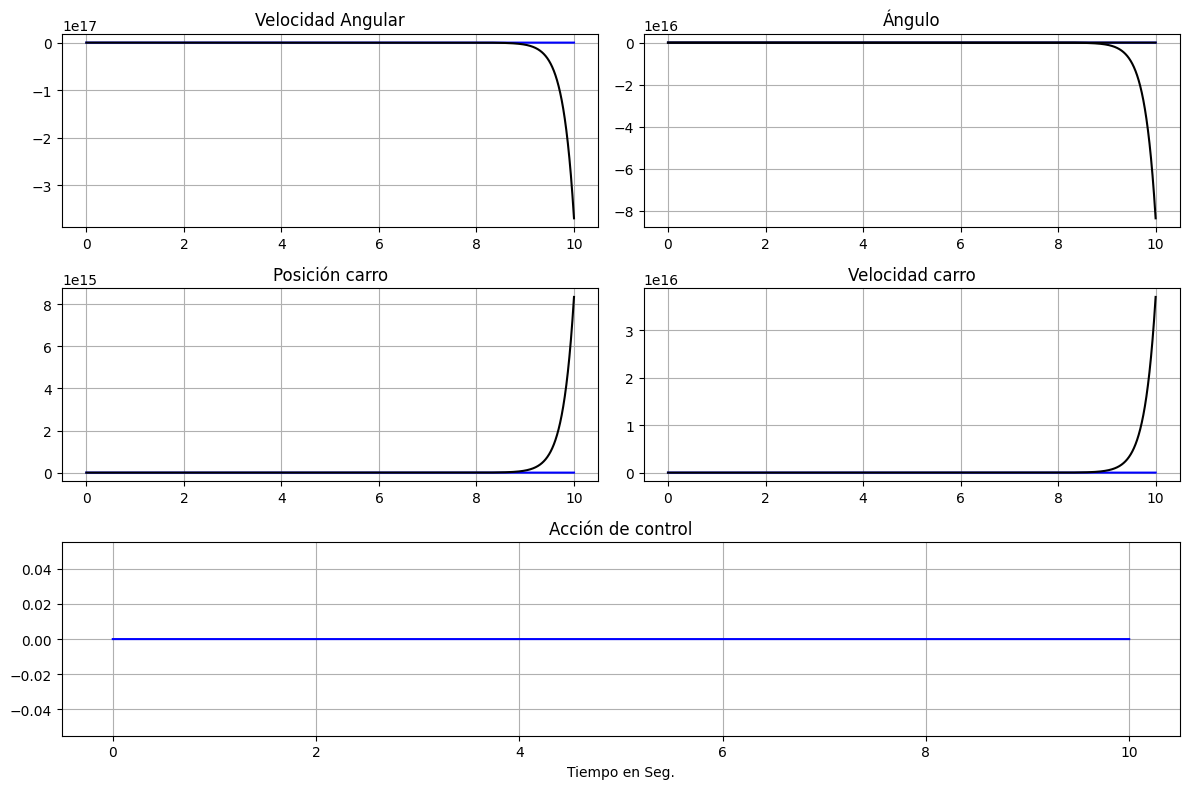

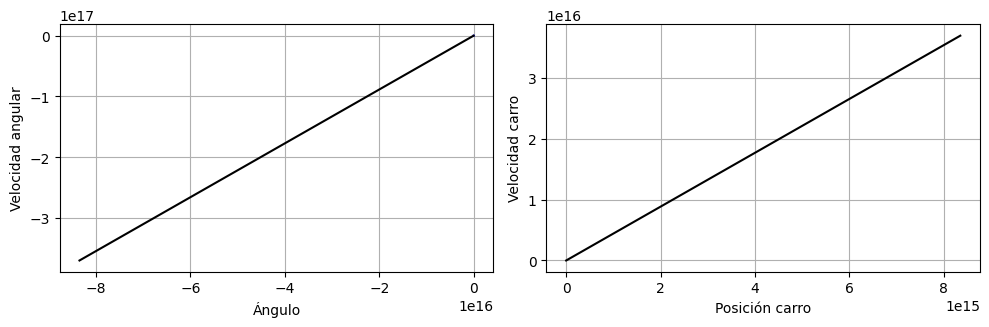

TCalculo = 6.130599498748779 segundos


In [23]:
# @title

#Simulacion para el estado inestable fi=0
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.1
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales (equilibrio inestable φ ≈ 0)
alfa[0] = -0.01  # pequeño desvío desde φ = 0
omega[0] = 0     # velocidad angular
p[0] = 0        # posicion del carro
p_p[0] = 0      # velocidad del carro
color = 'b'

# Matrices del sistema linealizado (equilibrio inestable φ ≈ 0)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, Fricc/(long*M), (M + m)*g/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

# Punto de equilibrio
X0 = np.array([0, 0, 0, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    try:
        sol = np.linalg.solve(A, b)
        p_pp_val = sol[0]
        tita_pp_val = sol[1]
    except np.linalg.LinAlgError:
        # En caso de matriz singular (poco probable aquí)
        p_pp_val = 0
        tita_pp_val = 0

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.zeros_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador_VI.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

3-	Modificar la masa m al doble y repetir la operación.

Para el equilibrio estable

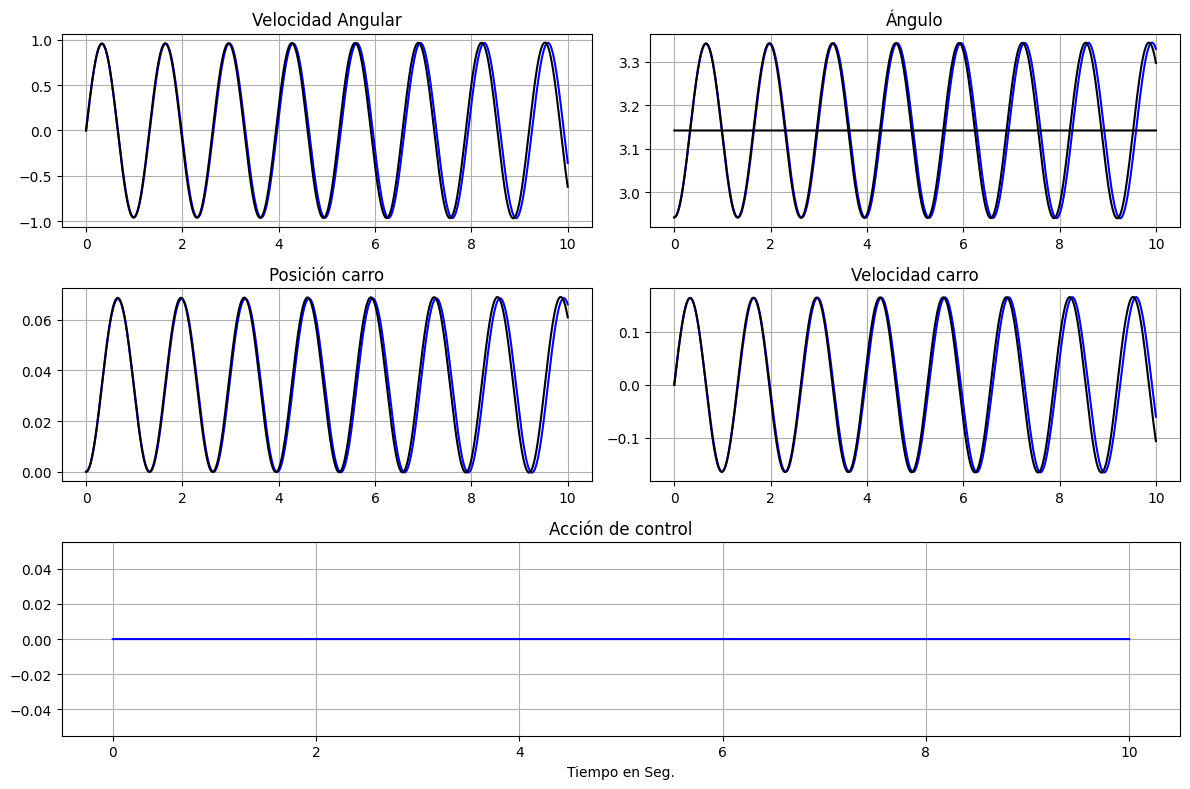

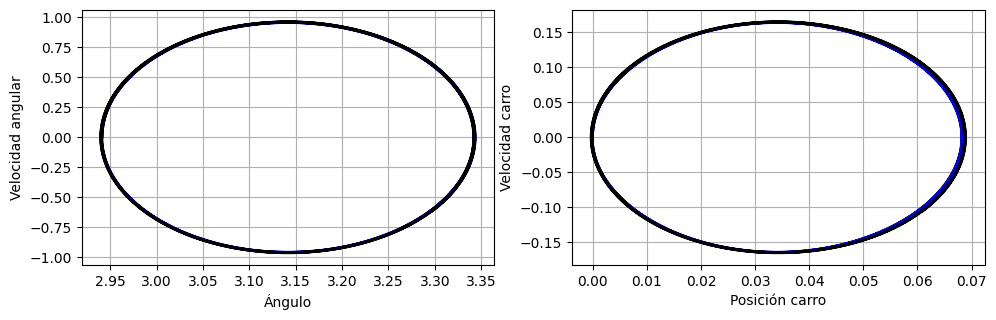

TCalculo = 7.4047956466674805 segundos


In [25]:
# @title
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.2
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi - 0.2
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

Para el equilibrio inestable

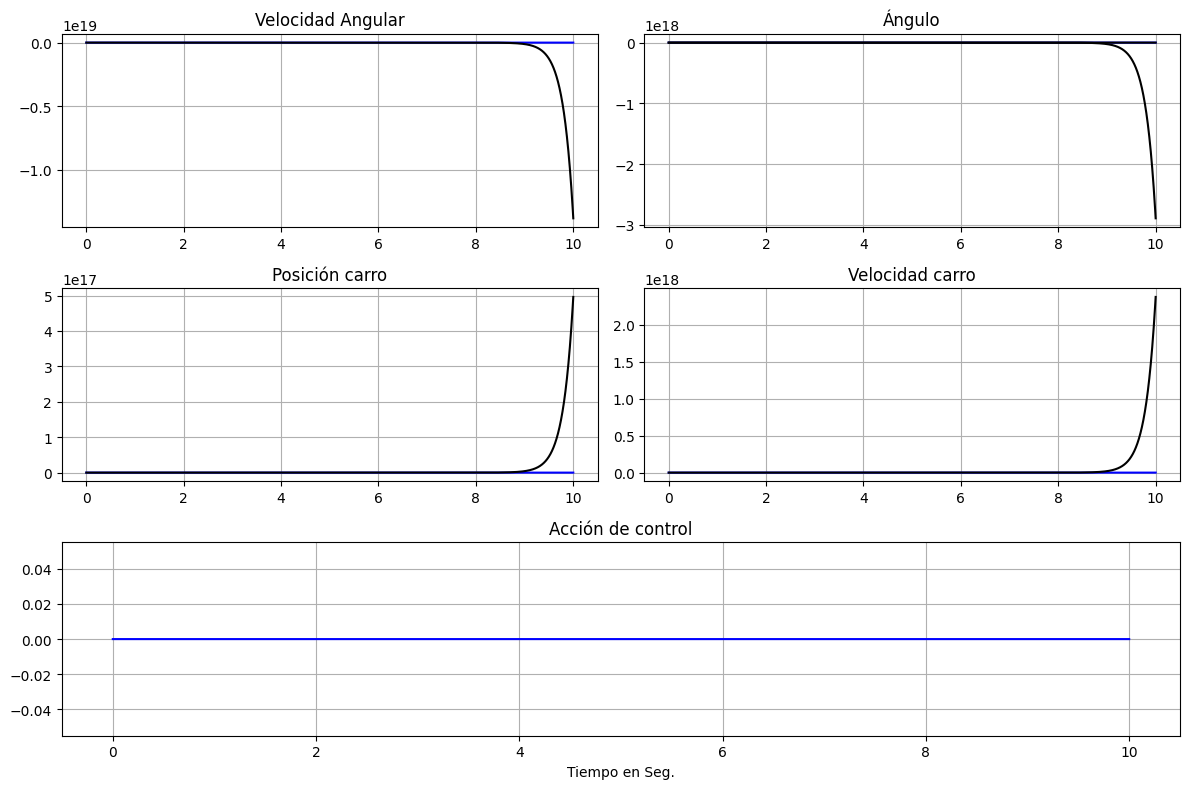

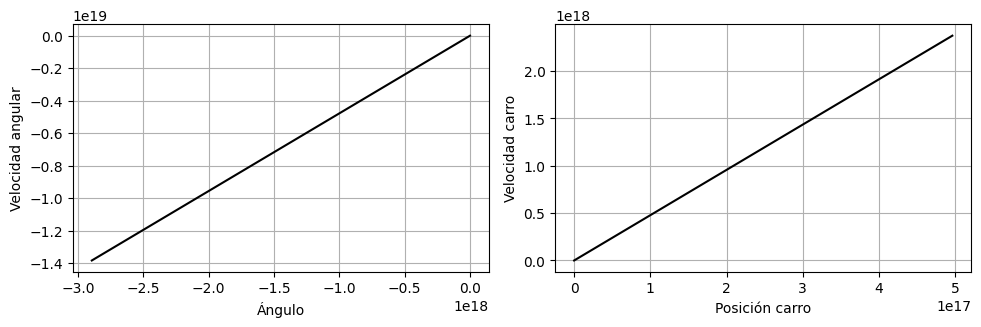

TCalculo = 6.806453704833984 segundos


In [24]:
# @title

#Simulacion para el estado inestable fi=0
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.2
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales (equilibrio inestable φ ≈ 0)
alfa[0] = -0.01  # pequeño desvío desde φ = 0
omega[0] = 0     # velocidad angular
p[0] = 0        # posicion del carro
p_p[0] = 0      # velocidad del carro
color = 'b'

# Matrices del sistema linealizado (equilibrio inestable φ ≈ 0)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, Fricc/(long*M), (M + m)*g/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

# Punto de equilibrio
X0 = np.array([0, 0, 0, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    try:
        sol = np.linalg.solve(A, b)
        p_pp_val = sol[0]
        tita_pp_val = sol[1]
    except np.linalg.LinAlgError:
        # En caso de matriz singular (poco probable aquí)
        p_pp_val = 0
        tita_pp_val = 0

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.zeros_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador_VI.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

1. Obtener la representación lineal en variables de estado para el equilibrio estable, para lo que se sugiere obtener la versión simplificada con las funciones seno y coseno linealizadas, y luego sí despejar las derivadas segundas como muestra la Fig. 1-6, donde $\ddot{\phi}$ es $\phi_{\text{pp}}$ y $\ddot{\delta}$ es $\delta_{\text{pp}}$.

El resultado se muestra en el punto 1-


5-	Obtener la solución numérica de los dos sistemas, del lineal y del no lineal para evaluar cuantitativamente la equivalencia, modificando m de 0,1 a 0,01 y la longitud l a 1,2m.


Para el equilibrio estable

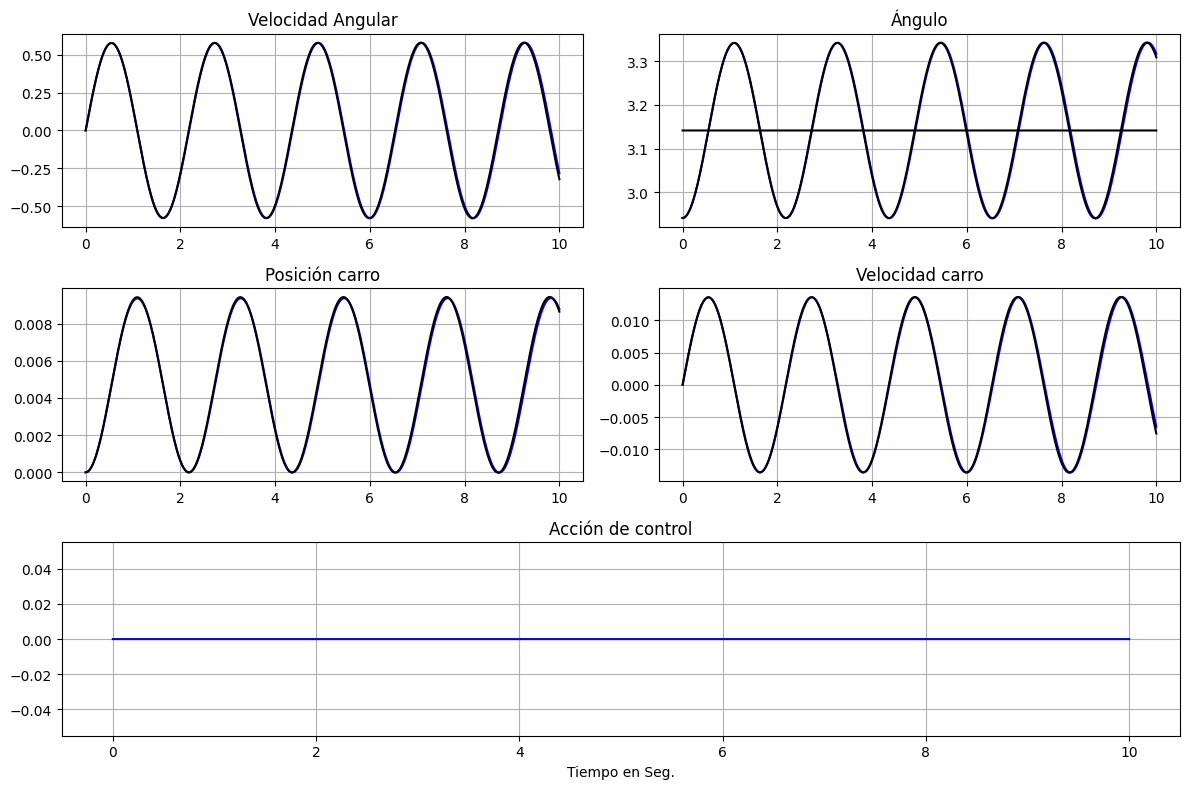

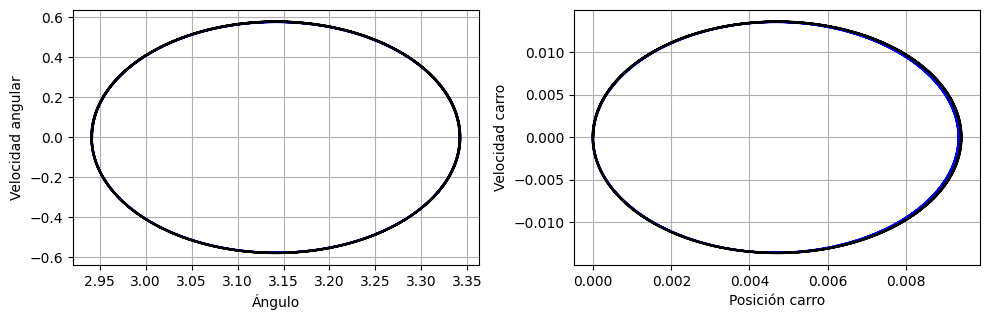

TCalculo = 6.05744481086731 segundos


In [26]:
# @title
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.01
Fricc = 0
long = 1.2
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi - 0.2
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

Para el equilibrio inestable

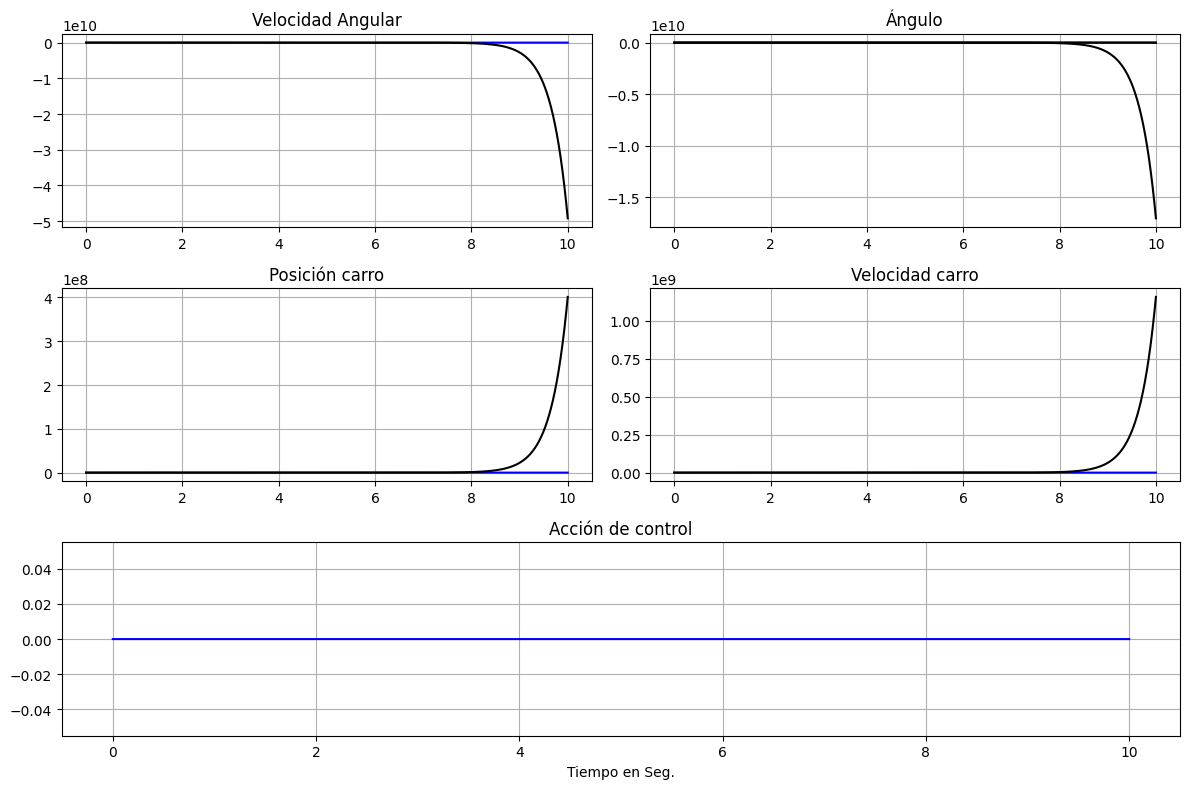

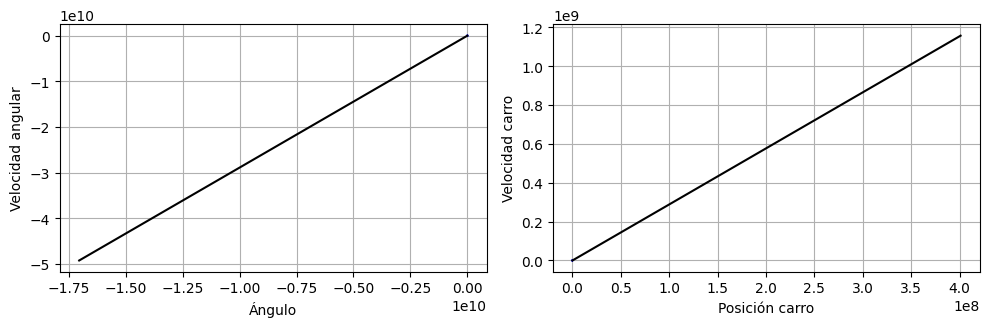

TCalculo = 6.330310106277466 segundos


In [27]:
# @title

#Simulacion para el estado inestable fi=0
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.01
Fricc = 0
long = 1.2
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales (equilibrio inestable φ ≈ 0)
alfa[0] = -0.01  # pequeño desvío desde φ = 0
omega[0] = 0     # velocidad angular
p[0] = 0        # posicion del carro
p_p[0] = 0      # velocidad del carro
color = 'b'

# Matrices del sistema linealizado (equilibrio inestable φ ≈ 0)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, Fricc/(long*M), (M + m)*g/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

# Punto de equilibrio
X0 = np.array([0, 0, 0, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    try:
        sol = np.linalg.solve(A, b)
        p_pp_val = sol[0]
        tita_pp_val = sol[1]
    except np.linalg.LinAlgError:
        # En caso de matriz singular (poco probable aquí)
        p_pp_val = 0
        tita_pp_val = 0

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.zeros_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador_VI.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

6. Obtener el sistema lineal para el equilibrio estable $x = [0 \ 0 \ \pi \ 0]^T$.

In [39]:
# @title
import sympy as sp
from IPython.display import display

# --- 1. Definir variables simbólicas ---
# Variables de estado
delta_sym, delta_dot_sym, phi_sym, phi_dot_sym = sp.symbols('delta delta_dot phi phi_dot')
# Entrada
u_sym = sp.symbols('u')
# Parámetros del sistema
M_sym, m_sym, l_sym, g_sym, Fricc_sym = sp.symbols('M m l g Fricc', positive=True)

# Vector de estado simbólico
x_sym = sp.Matrix([delta_sym, delta_dot_sym, phi_sym, phi_dot_sym])

# --- 2. Definir las ecuaciones no lineales de movimiento ---
# Basadas en las ecuaciones (13) de image_ef18cc.png
# Resolviendo el sistema 2x2 para las aceleraciones
# (M+m) * delta_ddot + m*l*cos(phi) * phi_ddot = u - Fricc*delta_dot + m*l*phi_dot**2*sin(phi)
# cos(phi) * delta_ddot + l * phi_ddot = g*sin(phi)

# Coeficientes de las aceleraciones en forma matricial para el sistema 2x2
coeff_matrix_sym = sp.Matrix([
    [M_sym + m_sym, m_sym * l_sym * sp.cos(phi_sym)],
    [sp.cos(phi_sym), l_sym]
])

# Vector de términos independientes
rhs_vector_sym = sp.Matrix([
    u_sym - Fricc_sym * delta_dot_sym + m_sym * l_sym * phi_dot_sym**2 * sp.sin(phi_sym),
    g_sym * sp.sin(phi_sym)
])

# Resolver para delta_ddot y phi_ddot
# sp.Matrix.inv() para la inversa de la matriz de coeficientes
# sp.simplify() para simplificar las expresiones resultantes
accelerations_sym = sp.simplify(coeff_matrix_sym.inv() * rhs_vector_sym)

delta_ddot_sym = accelerations_sym[0]
phi_ddot_sym = accelerations_sym[1]

# Vector de funciones de estado f(x, u)
f_x_u_sym = sp.Matrix([
    delta_dot_sym,
    delta_ddot_sym,
    phi_dot_sym,
    phi_ddot_sym
])

# --- 3. Definir el punto de equilibrio estable ---
# Para el péndulo invertido, el equilibrio estable es phi = pi (colgando hacia abajo)
# y todas las velocidades/fuerzas son cero en el equilibrio.
# Siendo u=0 para mantener el equilibrio sin perturbaciones.
eq_point_x = {
    delta_sym: 0,
    delta_dot_sym: 0,
    phi_sym: sp.pi, # Punto de equilibrio: phi = pi
    phi_dot_sym: 0
}
eq_point_u = {u_sym: 0}

# --- 4. Calcular las matrices Jacobianas A y B ---
# Matriz A = df/dx |_(x_eq, u_eq)
A_sym_expr = f_x_u_sym.jacobian(x_sym)
A_sym = sp.simplify(A_sym_expr.subs({**eq_point_x, **eq_point_u}))

# Matriz B = df/du |_(x_eq, u_eq)
B_sym_expr = f_x_u_sym.jacobian(sp.Matrix([u_sym]))
B_sym = sp.simplify(B_sym_expr.subs({**eq_point_x, **eq_point_u}))

# --- 5. Mostrar los resultados simbólicos ---
print("--- Matrices A y B del sistema lineal para el Equilibrio Estable (phi = pi) ---")
print("\nMatriz A (simbólica):")
display(A_sym)

print("\nMatriz B (simbólica):")
display(B_sym)


--- Matrices A y B del sistema lineal para el Equilibrio Estable (phi = pi) ---

Matriz A (simbólica):


⎡0     1          0       0⎤
⎢                          ⎥
⎢   -Fricc      -g⋅m       ⎥
⎢0  ───────     ─────     0⎥
⎢      M          M        ⎥
⎢                          ⎥
⎢0     0          0       1⎥
⎢                          ⎥
⎢   -Fricc   -g⋅(M + m)    ⎥
⎢0  ───────  ───────────  0⎥
⎣     M⋅l        M⋅l       ⎦


Matriz B (simbólica):


⎡ 0 ⎤
⎢   ⎥
⎢ 1 ⎥
⎢ ─ ⎥
⎢ M ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 1 ⎥
⎢───⎥
⎣M⋅l⎦

7-	Obtener la solución numérica de los dos sistemas, del lineal y del no lineal para evaluar cuantitativamente la equivalencia en el equilibrio estable modificando m de 0,1 a 0,01 y cambiar la longitud l a 1,2m.


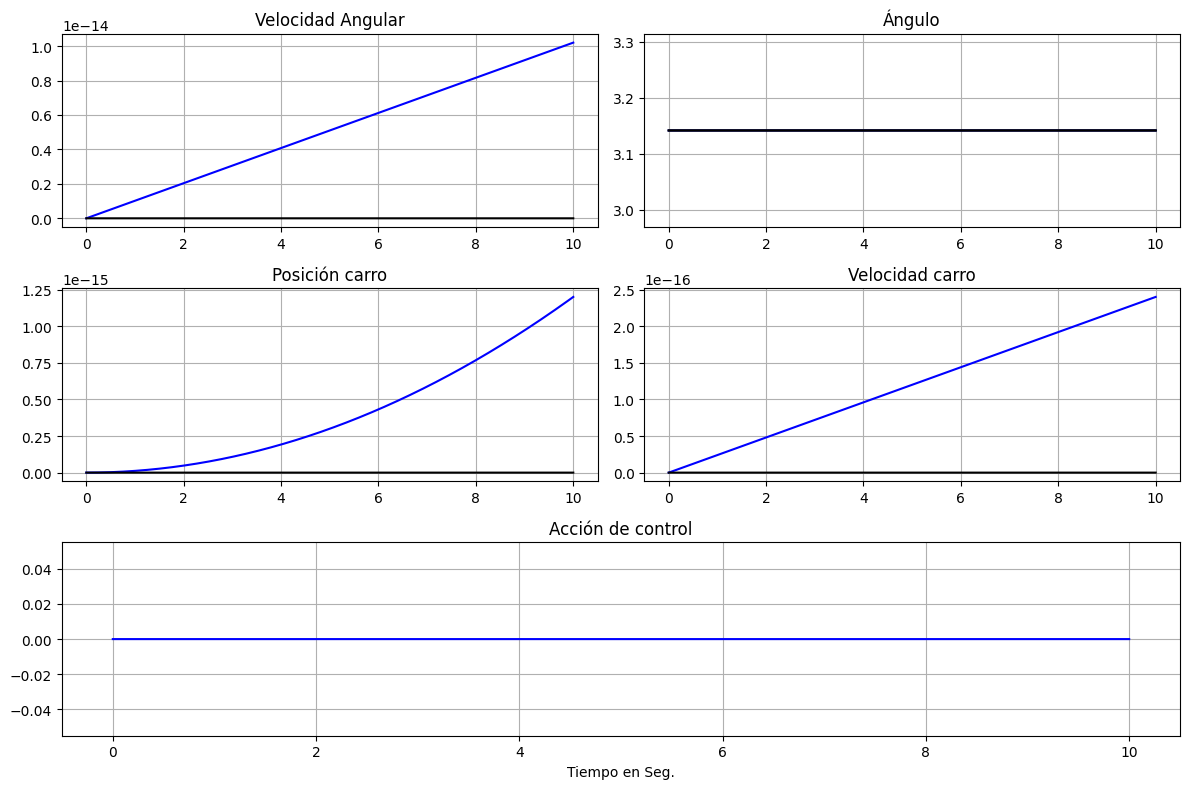

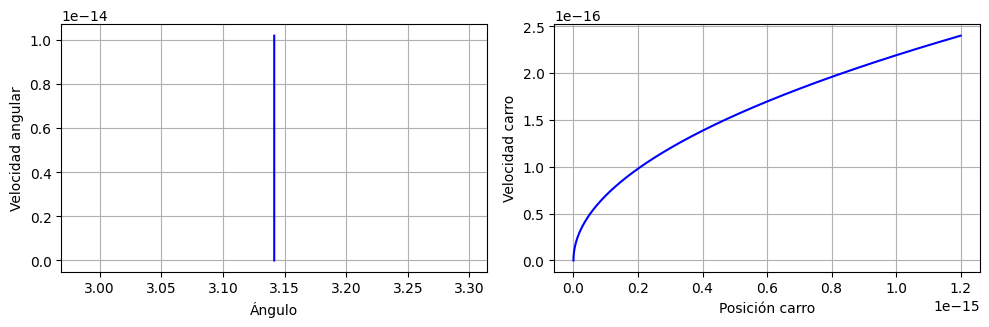

TCalculo = 5.9764180183410645 segundos


In [30]:
# @title
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.01
Fricc = 0
long = 1.2
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

Para este caso se observa que las simulaciones con el metodo de Euler no coincide con la simulacion de las expresiones analiticas de la velocidad angular, la posicion y la velocidad del carro, aunque los valores obtenidos con el metodo numerico son cercanos a 0.

**Informe**

Se ha implementado el lenguaje Python para la simulacion de los sistemas dinamicos circuito RLC, vuelo de un avion y pendulo invertido.

Se han obtenido las ecuaciones analiticas y las matrices de los sistemas lineales de manera simbolica.

Se ha implementado el metodo de Euler para la simulacion de los correspondientes sistemas lineales.

Ademas se ha utilizado el entorno Colaboratory tanto para la ejecucion de los script como para incluir textos y figuras.

Se ha obtenido la version pdf de la tarea, aunque no se logra un texto ordenado.

Cabe destacar que hasta el momento las tareas realizadas me han ayudado a implementar la simulacion de operaciones de transferencia de materia en la asignatura que dicto. 😀

